In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [97]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((478741, 27), (121259, 27))

In [98]:
train.isnull().sum()[train.isnull().sum()!=0]

Time                           14
Road_Surface_Conditions       452
Special_Conditions_at_Site     63
dtype: int64

In [99]:
test.isnull().sum()[test.isnull().sum()!=0]

Time                           1
Road_Surface_Conditions       39
Special_Conditions_at_Site    10
dtype: int64

In [100]:
df = pd.concat([train,test], ignore_index = True)
df.shape

(600000, 27)

In [101]:
df1 = df.copy()

In [102]:
df1.set_index('Accident_ID',inplace=True)

In [103]:
df1.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
Accident_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,34,2,1,19/12/12,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
2,5,2,1,02/11/12,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
3,1,2,1,02/11/12,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
4,1,1,1,06/05/12,1,16:50,7,E08000035,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
5,46,1,1,30/06/12,3,13:25,519,E10000031,3,24,Dual carriageway,30,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [104]:
df1.sort_index(inplace = True)

# Checking Duplicates

In [105]:
df1[df1.duplicated(keep = 'first')]

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
Accident_ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [106]:
df1[df1.index.duplicated()]

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
Accident_ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 1 to 600000
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Police_Force                                 600000 non-null  int64 
 1   Number_of_Vehicles                           600000 non-null  int64 
 2   Number_of_Casualties                         600000 non-null  int64 
 3   Date                                         600000 non-null  object
 4   Day_of_Week                                  600000 non-null  int64 
 5   Time                                         599985 non-null  object
 6   Local_Authority_(District)                   600000 non-null  int64 
 7   Local_Authority_(Highway)                    600000 non-null  object
 8   1st_Road_Class                               600000 non-null  int64 
 9   1st_Road_Number                              600000 non-null  int64 
 

## Generating Target Variable

In [108]:
tgt = np.round((df.groupby(['postcode'])['Number_of_Casualties'].sum())/(df.groupby(['postcode'])['Accident_ID'].count()),2)

In [109]:
df1['Accident_Risk_Index'] = df1['postcode'].map(tgt)

In [110]:
df1.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,Accident_Risk_Index
Accident_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,34,2,1,19/12/12,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,1.57
2,5,2,1,02/11/12,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,0.33
3,1,2,1,02/11/12,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,1.14
4,1,1,1,06/05/12,1,16:50,7,E08000035,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom,1.67
5,46,1,1,30/06/12,3,13:25,519,E10000031,3,24,Dual carriageway,30,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom,0.75


# <font color='purple'> Understanding Categorical variables

In [111]:
# Categorical variable list
cat = list(df1.select_dtypes(include='object').columns)

In [112]:
# Number of unique in each categotical variable
cat_unique_len = dict()
for i in df1.select_dtypes(include='object').columns:
    print(f'{i}')
    print(len(df1[i].unique()))
    print('-------------------------------------------')
    cat_unique_len[i]=len(df1[i].unique())

Date
731
-------------------------------------------
Time
1380
-------------------------------------------
Local_Authority_(Highway)
207
-------------------------------------------
Road_Type
6
-------------------------------------------
Pedestrian_Crossing-Human_Control
3
-------------------------------------------
Pedestrian_Crossing-Physical_Facilities
6
-------------------------------------------
Light_Conditions
5
-------------------------------------------
Weather_Conditions
9
-------------------------------------------
Road_Surface_Conditions
6
-------------------------------------------
Special_Conditions_at_Site
9
-------------------------------------------
Carriageway_Hazards
6
-------------------------------------------
Did_Police_Officer_Attend_Scene_of_Accident
2
-------------------------------------------
state
3
-------------------------------------------
postcode
99689
-------------------------------------------
country
1
-------------------------------------------


In [113]:
# All the unique classes in each categorical variables
for i in df1.select_dtypes(include='object').columns:
    print(f'{i}')
    print(df1[i].unique())
    print('-------------------------------------------')

Date
['19/12/12' '02/11/12' '06/05/12' '30/06/12' '04/03/12' '11/04/12'
 '06/06/12' '27/03/12' '13/09/12' '04/02/12' '09/11/12' '08/01/12'
 '06/10/13' '19/01/12' '22/06/12' '22/04/13' '17/02/12' '08/08/12'
 '03/02/12' '27/09/13' '27/09/12' '13/03/13' '28/04/12' '24/07/12'
 '18/10/12' '10/10/12' '13/06/13' '11/01/12' '16/03/12' '10/11/12'
 '13/04/12' '21/11/12' '30/08/12' '15/11/12' '08/09/12' '04/04/12'
 '23/02/12' '22/02/12' '06/01/12' '31/05/12' '13/12/12' '17/05/12'
 '30/05/12' '16/07/12' '21/06/12' '26/04/12' '14/11/12' '11/08/13'
 '10/09/12' '22/09/12' '04/10/12' '24/10/13' '19/07/13' '31/01/12'
 '01/05/12' '26/07/12' '30/03/12' '07/03/12' '07/01/13' '12/05/12'
 '12/10/12' '24/10/12' '14/09/12' '01/09/13' '27/11/12' '23/12/13'
 '13/06/12' '31/12/12' '23/01/12' '28/11/12' '07/04/12' '24/11/12'
 '24/06/13' '16/10/12' '02/03/13' '21/12/12' '30/04/13' '26/09/12'
 '08/02/12' '24/01/12' '02/10/12' '06/10/12' '20/02/12' '26/01/12'
 '08/01/13' '23/04/12' '04/09/12' '09/08/12' '01/02/12' '

['Single carriageway' 'One way street' 'Roundabout' 'Dual carriageway'
 'Slip road' 'Unknown']
-------------------------------------------
Pedestrian_Crossing-Human_Control
['None within 50 metres' 'Control by other authorised person'
 'Control by school crossing patrol']
-------------------------------------------
Pedestrian_Crossing-Physical_Facilities
['No physical crossing within 50 meters' 'Zebra crossing'
 'Pedestrian phase at traffic signal junction'
 'non-junction pedestrian crossing' 'Central refuge'
 'Footbridge or subway']
-------------------------------------------
Light_Conditions
['Daylight: Street light present' 'Darkness: Street lighting unknown'
 'Darkness: Street lights present and lit' 'Darkeness: No street lighting'
 'Darkness: Street lights present but unlit']
-------------------------------------------
Weather_Conditions
['Fine without high winds' 'Raining without high winds'
 'Snowing without high winds' 'Fine with high winds'
 'Raining with high winds' 'Unknown'

# **Data Disctionary for Categorical variables**
* **DATE**: Not so sure on what to do with Date.
* **TIME**: There is 1368 unique time so it can be saperated into categories but will take a lot of time.
* **Local_Authority_(Highway)**: Local Authority that can enact traffic rules. (Different state wise)
    * **'EHEATHROW'**: Hearthrow is an airport in England. https://www.google.com/search?client=firefox-b-d&q=EHEATHROW
    * **'W06000020'**: This is Torfaen is a county(Guessing similar to a state but not a state since there are three states given in the data) in Wales. https://en.wikipedia.org/wiki/Torfaen
    * E in the data is for England and S is for Scotland
* **Road_Type**:  Carriageway stands for highway. single carriageway is two lane highway. Roundabout is circle. Dual Carriageway is 4 lane highway. Slip Road is service road.
* **Pedestrian_Crossing-Human_Control**: A form of pedestrian crossing that gives priority to pedestrians or cycles crossing a road. Controlled crossings should be contrasted with a uncontrolled crossings, which do not give priority to pedestrians, and which typically take the form of subtle road markings, sometimes combined with a central refuge. https://www.cycling-embassy.org.uk/dictionary/controlled-crossing
    * **'None within 50 metres'**: I am guessing none within 50 meters of accident took place.
    * **'Control by other authorised person'**: 'Control by school crossing patrol' Controlled by someone
* **Pedestrian_Crossing-Physical_Facilities**: Physical facilities available for pedestrain
    * **No physical crossing within 50 meters**: None within 50 meters of accident (guess)
    * **Zebra crossing**: zebra crossing
    * **Pedestrian phase at traffic signal junction**: Traffic signal for pedestrian
    * **non-junction pedestrian crossing**: A type of pedestrain crossing
    * **Central refuge**: A stop where pedestrain can stop before finishing to cross the road
    * **Footbridge or subway**: a bridge or underground tunnel for pedestrain
* **Light_Conditions**: Light condition during accident
    * **Daylight: Street light present**: daylight and street light also present
    * **Darkness: Street lighting unknown**: Unknown condition
    * **Darkness: Street lights present and lit**: Present and lit during accident
    * **Darkeness: No street lighting**: Absence of street light
    * **Darkness: Street lights present but unlit**: Not lit street light
* **Weather_Conditions**: Wheather conditions during accident
* **Carriageway_Hazards**: Different Hazards on the highways
    * **Any animal (except a ridden horse)**: Animal on road expect a horse
    * **Pedestrian in carriageway (not injured)**: A pedestrian on the road
    * **Dislodged vehicle load in carriageway**: Vehicle load on highway (what kind of load is debatable)
    * **Involvement with previous accident**: Not sure what it says
* **state**:
    * Alba / Scotland: Alba is another name for Scotland
    * Cymru / Wales: Cymru is another name for Wales

In [114]:
cat_unique_len

{'Date': 731,
 'Time': 1380,
 'Local_Authority_(Highway)': 207,
 'Road_Type': 6,
 'Pedestrian_Crossing-Human_Control': 3,
 'Pedestrian_Crossing-Physical_Facilities': 6,
 'Light_Conditions': 5,
 'Weather_Conditions': 9,
 'Road_Surface_Conditions': 6,
 'Special_Conditions_at_Site': 9,
 'Carriageway_Hazards': 6,
 'Did_Police_Officer_Attend_Scene_of_Accident': 2,
 'state': 3,
 'postcode': 99689,
 'country': 1}

## Treating Null Values

In [115]:
df1.isnull().sum()[df1.isnull().sum()!=0]

Time                           15
Road_Surface_Conditions       491
Special_Conditions_at_Site     73
dtype: int64

### Road_Surface_Conditions

In [116]:
df1['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', nan,
       'Flood (Over 3cm of water)'], dtype=object)

In [117]:
df1['Road_Surface_Conditions'].value_counts()/len(df1)*100
# Remove flood, Snow, Frost/ice

Dry                          74.696500
Wet/Damp                     20.143333
Frost/Ice                     3.414333
Snow                          1.647833
Flood (Over 3cm of water)     0.016167
Name: Road_Surface_Conditions, dtype: float64

In [118]:
len(df1[(df1['Road_Surface_Conditions'] == 'Snow')])

9887

In [119]:
df1.drop(df1[(df1['Road_Surface_Conditions'] == 'Snow')].index,inplace = True)

In [120]:
len(df1[(df1['Road_Surface_Conditions'] == 'Flood (Over 3cm of water)')])

97

In [121]:
df1.drop(df1[(df1['Road_Surface_Conditions'] == 'Flood (Over 3cm of water)')].index, inplace = True)

In [122]:
len(df1[(df1['Road_Surface_Conditions'] == 'Frost/Ice')])

20486

In [123]:
df1.drop(df1[(df1['Road_Surface_Conditions'] == 'Frost/Ice')].index, inplace = True)

In [124]:
df1['Road_Surface_Conditions'].value_counts()/len(df1)*100

Dry         78.692782
Wet/Damp    21.221007
Name: Road_Surface_Conditions, dtype: float64

In [125]:
# Road_Surface_Conditions
df1['Road_Surface_Conditions'].fillna(df1['Road_Surface_Conditions'].mode()[0],inplace=True)

### Time

In [126]:
df1.Time.mode()

0    16:00
Name: Time, dtype: object

In [127]:
df1.Time.fillna(df1.Time.mode()[0], inplace = True)

### Special_Conditions_at_Site

In [128]:
df1['Special_Conditions_at_Site'].value_counts()/len(df1)*100

None                                               89.302934
Roadworks                                           9.638649
Ol or diesel                                        0.252840
Road surface defective                              0.241954
Mud                                                 0.195775
Auto traffic singal out                             0.171721
Permanent sign or marking defective or obscured     0.131863
Auto traffic signal partly defective                0.053026
Name: Special_Conditions_at_Site, dtype: float64

In [129]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Ol or diesel'].index, inplace = True)

In [130]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Road surface defective'].index, inplace = True)

In [131]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Mud'].index, inplace = True)

In [132]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Auto traffic singal out'].index, inplace = True)

In [133]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Permanent sign or marking defective or obscured'].index, inplace = True)

In [134]:
df1.drop(df1[df1['Special_Conditions_at_Site'] == 'Auto traffic signal partly defective'].index, inplace = True)

In [135]:
df1['Special_Conditions_at_Site'].value_counts()/len(df1)*100

None         90.247992
Roadworks     9.740651
Name: Special_Conditions_at_Site, dtype: float64

In [136]:
df1['Special_Conditions_at_Site'].mode()

0    None
Name: Special_Conditions_at_Site, dtype: object

In [137]:
# Special_Conditions_at_Site
df1['Special_Conditions_at_Site'].fillna('None',inplace=True)

In [138]:
df1.isnull().sum()[df1.isnull().sum()!=0]

Series([], dtype: int64)

In [139]:
df1.shape

(563566, 27)

# <font color='purple'> Understanding Numerical variables

In [140]:
# List of numerical features
num = list(df1.select_dtypes(include=np.number).columns)

In [141]:
df1['1st_Road_Number'].unique()

array([  13,    8,   24, ..., 9216, 6088, 6981], dtype=int64)

In [142]:
df1[num]

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Accident_Risk_Index
Accident_ID,,,,,,,,,,,,
2,5,2,1,4,102,3,13,30,-1,0,1,0.33
3,1,2,1,4,531,6,8,40,6,0,1,1.14
4,1,1,1,1,7,6,13,30,6,0,1,1.67
5,46,1,1,3,519,3,24,30,6,0,1,0.75
6,44,2,1,1,638,6,1,30,6,0,1,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...
599996,13,2,1,4,211,6,1293,30,-1,0,1,1.17
599997,6,2,4,6,80,3,310,30,-1,0,1,1.79
599998,33,2,1,2,321,3,3283,30,5,0,2,1.56


# Data Dictionary of Numerical columns
* **Accident_ID**: Id of the accident
* **Police_Force**: Number of police force deployed at the accident scene
* **Number_of_Vehicles**: Number of vehicles involved in accident
* **Number_of_Casualties**: Deaths in the accidents
* **Day_of_Week**: Sunday,Monday,...etc
* **Local_Authority_(District)**: Cannot decide based on state. It should be category and not numerical
    * Can be differentiated based on England(east west..etc),Wales(east, west, etc..), Scotland(east, west, etc..)
* **Speed_limit**: Speed limit on the road 
* **Urban_or_Rural_Area**: Type of area at which accident happened
* **1st_Road_Class**: Different types of roads https://www.gov.uk/government/publications/guidance-on-road-classification-and-the-primary-route-network/guidance-on-road-classification-and-the-primary-route-network
    * **1**: **Motorways** - 
    * **3**: **A roads** – major roads intended to provide large-scale transport links within or between areas
    * **4**: **B roads** – roads intended to connect different areas, and to feed traffic between A roads and smaller roads on the network
    * **5**: **classified unnumbered** – smaller roads intended to connect together unclassified roads with A and B roads, and often linking a housing estate or a village to the rest of the network. Similar to ‘minor roads’ on an Ordnance Survey map and sometimes known unofficially as **C roads**
    * **6**: **unclassified** – local roads intended for local traffic. The vast majority (60%) of roads in the UK fall within this category
* **1st_Road_Number**: Number of road
* **2nd_Road_Class**: Types are same as 1st road class.
* **2nd_Road_Number**: Number of road

### Police_Force

In [143]:
df1.Police_Force.unique()

array([ 5,  1, 46, 44, 43, 42,  6,  7, 15, 13, 21, 12, 52, 96, 14, 22, 95,
       11, 61, 53, 50, 93, 94, 34, 51, 63, 92, 32, 35, 36, 20,  4, 62, 16,
       41, 33, 45, 47, 97, 10, 98, 23,  3, 49, 60, 31,  9, 17, 48, 54,  8,
       37, 59, 40, 64, 55, 30, 19, 91, 38,  2, 29, 39, 56, 18, 24],
      dtype=int64)

In [144]:
min(df1.Police_Force), max(df1.Police_Force)

(1, 98)

In [145]:
# To bring it in range we need to do scaling

### Number_of_Vehicles

In [146]:
df1.Number_of_Vehicles.unique()

array([2, 1, 3, 4], dtype=int64)

In [147]:
df1.Number_of_Vehicles.value_counts()/len(df1.Number_of_Vehicles)*100
# remove 3,4

2    62.428535
1    30.991401
3     5.239670
4     1.340393
Name: Number_of_Vehicles, dtype: float64

In [148]:
df1.drop(df1[df1.Number_of_Vehicles == 3].index, inplace = True)

In [149]:
df1.drop(df1[df1.Number_of_Vehicles == 4].index, inplace = True)

In [150]:
df1.Number_of_Vehicles.value_counts()/len(df1.Number_of_Vehicles)*100

2    66.825709
1    33.174291
Name: Number_of_Vehicles, dtype: float64

### Number_of_Casualties

In [151]:
df1.Number_of_Casualties.unique()

array([1, 3, 0, 2, 4, 5], dtype=int64)

In [152]:
df1.Number_of_Casualties.value_counts()/len(df1.Number_of_Casualties)*100
# Remove 3,4,5

1    54.476403
0    20.846637
2    16.452573
3     5.762009
4     1.494445
5     0.967932
Name: Number_of_Casualties, dtype: float64

In [153]:
df1.drop(df1[df1.Number_of_Casualties == 3].index, inplace = True)

In [154]:
df1.drop(df1[df1.Number_of_Casualties == 4].index, inplace = True)

In [155]:
df1.drop(df1[df1.Number_of_Casualties == 5].index, inplace = True)

In [156]:
df1.Number_of_Casualties.value_counts()/len(df1.Number_of_Casualties)*100

1    59.358256
0    22.714789
2    17.926955
Name: Number_of_Casualties, dtype: float64

### Day_of_Week

In [157]:
df1.Day_of_Week.unique()

array([4, 1, 3, 2, 6, 5, 7], dtype=int64)

In [158]:
df1.Day_of_Week.value_counts()/len(df1.Day_of_Week)*100

6    20.077693
3    19.761457
7    15.811608
5    14.567565
2    12.264711
4     9.373674
1     8.143291
Name: Day_of_Week, dtype: float64

### Local_Authority_(District)

In [159]:
df1['Local_Authority_(District)'].unique()

array([102, 531,   7, 519, 638, 502, 529,  95,  87, 521, 305, 218, 279,
       157, 203,  26, 205, 155, 152, 939, 520,   6, 144, 325, 923,  81,
        23, 908, 253,  27, 349, 299,   9, 503, 485, 479, 161, 755, 446,
       933,  99, 141, 150, 283, 668, 644, 292, 137, 489, 647, 656,  22,
       513, 649, 199, 523, 471, 494, 486, 309, 922,  80,  25, 318, 929,
       497, 303,  91, 300, 634, 672,  24, 135,  20, 293,  71, 524, 715,
       233, 643, 326, 345, 907,  92,  82, 201, 504,  21, 145, 678, 467,
       930, 671, 684,  93, 200,  89,  18, 132,   1,  85, 331, 613, 306,
       204, 532, 321, 525, 320, 198, 195, 322,  94, 686, 330,  83, 278,
       898, 248, 553, 576, 208, 541, 505, 533, 659, 275, 352, 468,  98,
        96, 534, 287, 498, 518, 343, 190, 271, 562, 924, 490, 558,  75,
       491, 108,  10, 527, 590,   8, 193,  79, 353, 106,  12, 500, 528,
       202, 560, 928, 544, 512, 333, 207, 214, 941, 611, 905, 192, 633,
        28, 648, 517, 110, 539, 314, 690, 105, 932, 465, 310, 26

In [160]:
len(df1['Local_Authority_(District)'].unique())

879

In [161]:
min(df1['Local_Authority_(District)'].unique()), max(df1['Local_Authority_(District)'].unique())

(1, 941)

### 1st_Road_Class

In [162]:
df1['1st_Road_Class'].unique()

array([3, 6, 5, 4, 1], dtype=int64)

In [163]:
df1['1st_Road_Class'].value_counts()/len(df1['1st_Road_Class'])*100
# Remove 1

6    36.658781
3    31.582444
4    16.818266
5    13.181341
1     1.759168
Name: 1st_Road_Class, dtype: float64

In [164]:
df1.drop(df1[df1['1st_Road_Class'] == 1].index, inplace = True)

In [165]:
df1['1st_Road_Class'].value_counts()/len(df1['1st_Road_Class'])*100

6    37.315219
3    32.147981
4    17.119425
5    13.417375
Name: 1st_Road_Class, dtype: float64

### 1st_Road_Number

In [166]:
df1['1st_Road_Number'].unique()

array([  13,    8,   24, ..., 6088, 6981, 6071], dtype=int64)

In [167]:
len(df1['1st_Road_Number'].unique())

5476

### Speed_limit

In [168]:
df1.Speed_limit.unique()

array([30, 40, 20, 60, 50, 70], dtype=int64)

In [169]:
df1.Speed_limit.value_counts()/len(df1)*100
# remove 70,20,50

30    75.282452
60    11.497568
40     6.226050
20     2.416349
70     2.330187
50     2.247395
Name: Speed_limit, dtype: float64

### 2nd_Road_Class

In [170]:
df1['2nd_Road_Class'].unique()
# -1 will change to 1

array([-1,  6,  5,  3,  4], dtype=int64)

In [171]:
df1['2nd_Road_Class'].replace({-1:1}, regex = True, inplace = True)

In [172]:
df1['2nd_Road_Class'].unique()

array([1, 6, 5, 3, 4], dtype=int64)

In [173]:
df1['2nd_Road_Class'].value_counts()/len(df1)*100
# remove 3,5,4

6    44.535195
1    38.633994
3     8.311652
5     5.440894
4     3.078265
Name: 2nd_Road_Class, dtype: float64

In [174]:
df1.drop(df1[df1['2nd_Road_Class'] == 3].index, inplace = True)

In [175]:
df1.drop(df1[df1['2nd_Road_Class'] == 4].index, inplace = True)

In [176]:
df1.drop(df1[df1['2nd_Road_Class'] == 5].index, inplace = True)

In [177]:
df1['2nd_Road_Class'].value_counts()/len(df1)*100

6    53.547709
1    46.452291
Name: 2nd_Road_Class, dtype: float64

### 2nd_Road_Number

In [178]:
df1['2nd_Road_Number'].unique()
# Will Remove the column

array([0], dtype=int64)

In [179]:
df1.drop('2nd_Road_Number', axis = 1, inplace = True)

### Urban_or_Rural_Area

In [180]:
df1.groupby(df1['Urban_or_Rural_Area']).count()['state']/len(df1)*100
# Unbalanced data

Urban_or_Rural_Area
1    67.619747
2    32.380253
Name: state, dtype: float64

In [181]:
df1.shape

(394790, 26)

# Handling high cardinality in categorical Features and Feature Engineering

### Date

In [182]:
len(df1.Date.unique())

731

In [183]:
df1['Day'] = df1.Date.str.split('/',expand=True)[0]

In [184]:
df1['Month'] = df1.Date.str.split('/',expand = True)[1]

In [185]:
df1['Year'] = df1.Date.str.split('/',expand = True)[2]

In [186]:
df1.drop('Date', axis = 1, inplace = True)

In [187]:
df1.Day = df1.Day.astype(int)
df1.Month = df1.Month.astype(int)
df1.Year = df1.Year.astype(int)

### Time

In [188]:
len(df1.Time.unique())

1364

In [189]:
df1.Time.replace({':':'.'}, regex = True, inplace = True)
df1.Time = df1.Time.astype(float)

In [190]:
df1.Time

Accident_ID
2          7.53
3         16.00
4         16.50
5         13.25
6         12.31
          ...  
599992     9.04
599993    22.54
599996    20.45
599999    11.50
600000    10.20
Name: Time, Length: 394790, dtype: float64

### Local_Authority_(Highway)

In [191]:
df1['Local_Authority_(Highway)'].unique()

array(['E09000026', 'E10000016', 'E08000035', 'E10000031', 'W06000004',
       'E06000049', 'E06000050', 'E09000025', 'E06000048', 'E10000029',
       'E10000032', 'E06000046', 'E06000009', 'E10000034', 'E06000018',
       'E09000016', 'E08000030', 'E10000009', 'S12000010', 'E06000022',
       'E09000027', 'S12000038', 'E06000002', 'S12000006', 'E10000006',
       'E09000012', 'E09000007', 'E08000022', 'E06000055', 'E10000024',
       'E06000030', 'S12000041', 'E06000054', 'E08000036', 'E10000015',
       'E06000014', 'E06000013', 'E08000019', 'W06000014', 'E06000043',
       'E08000009', 'E10000008', 'S12000018', 'E10000023', 'E10000012',
       'E10000007', 'E10000021', 'E08000017', 'E10000013', 'E09000013',
       'E06000039', 'E09000003', 'E09000028', 'E06000005', 'E09000022',
       'E08000015', 'E08000020', 'E10000030', 'E10000002', 'E08000012',
       'E06000040', 'E10000011', 'E10000017', 'E08000010', 'S12000036',
       'S12000024', 'W06000010', 'E06000038', 'E09000002', 'E100

In [192]:
def change(x):
    if 'E' in x:
        return 'E'
    elif 'S' in x:
        return 'S'
    elif 'W' in x:
        return 'W'

In [193]:
df1['Local_Authority_Highway_statewise'] = df1['Local_Authority_(Highway)'].apply(change)

In [194]:
df1['Local_Authority_Highway_statewise']

Accident_ID
2         E
3         E
4         E
5         E
6         W
         ..
599992    S
599993    E
599996    E
599999    E
600000    E
Name: Local_Authority_Highway_statewise, Length: 394790, dtype: object

In [195]:
df1.drop('Local_Authority_(Highway)', axis = 1, inplace = True)

### Road_Type

In [196]:
df1.Road_Type.unique()

array(['One way street', 'Roundabout', 'Single carriageway',
       'Dual carriageway', 'Slip road', 'Unknown'], dtype=object)

In [197]:
df1.Road_Type.value_counts()/len(df1)*100

Single carriageway    83.659667
Dual carriageway       9.521011
Roundabout             3.980344
One way street         2.787558
Slip road              0.048127
Unknown                0.003293
Name: Road_Type, dtype: float64

In [198]:
df1.drop(df1[df1.Road_Type == 'Roundabout'].index, inplace = True)

In [199]:
df1.drop(df1[df1.Road_Type == 'One way street'].index, inplace = True)

In [200]:
df1.drop(df1[df1.Road_Type == 'Slip road'].index, inplace = True)

In [201]:
df1.drop(df1[df1.Road_Type == 'Unknown'].index, inplace = True)

In [202]:
df1.Road_Type.value_counts()/len(df1)*100

Single carriageway    89.782204
Dual carriageway      10.217796
Name: Road_Type, dtype: float64

### Pedestrian_Crossing-Human_Control

In [203]:
df1['Pedestrian_Crossing-Human_Control'].value_counts()/len(df1)*100
# since it has one category with 95% value hence we need to drop this column

None within 50 metres                 94.795416
Control by other authorised person     5.199691
Control by school crossing patrol      0.004893
Name: Pedestrian_Crossing-Human_Control, dtype: float64

In [204]:
df1.drop('Pedestrian_Crossing-Human_Control', axis = 1, inplace = True)

### Pedestrian_Crossing-Physical_Facilities

In [205]:
df1['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['No physical crossing within 50 meters', 'Zebra crossing',
       'Pedestrian phase at traffic signal junction',
       'non-junction pedestrian crossing', 'Central refuge',
       'Footbridge or subway'], dtype=object)

In [206]:
df1['Pedestrian_Crossing-Physical_Facilities'].value_counts()/len(df1)*100
# since it has one category with 87% value hence we need to drop this column

No physical crossing within 50 meters          86.818098
Zebra crossing                                  5.743093
Pedestrian phase at traffic signal junction     4.966184
non-junction pedestrian crossing                2.043396
Central refuge                                  0.417269
Footbridge or subway                            0.011961
Name: Pedestrian_Crossing-Physical_Facilities, dtype: float64

In [207]:
df1.drop('Pedestrian_Crossing-Physical_Facilities', axis = 1, inplace = True)

### Light_Conditions

In [208]:
df1['Light_Conditions'].value_counts()/len(df1)*100

Daylight: Street light present               75.719280
Darkness: Street lights present and lit      18.582209
Darkness: Street lighting unknown             3.299009
Darkeness: No street lighting                 2.357095
Darkness: Street lights present but unlit     0.042407
Name: Light_Conditions, dtype: float64

In [209]:
df1.drop(df1[df1['Light_Conditions'] == 'Darkness: Street lighting unknown'].index, inplace = True)

In [210]:
df1.drop(df1[df1['Light_Conditions'] == 'Darkeness: No street lighting'].index, inplace = True)

In [211]:
df1.drop(df1[df1['Light_Conditions'] == 'Darkness: Street lights present but unlit'].index, inplace = True)

In [212]:
df1['Light_Conditions'].value_counts()/len(df1)*100

Daylight: Street light present             80.294893
Darkness: Street lights present and lit    19.705107
Name: Light_Conditions, dtype: float64

### Weather_Conditions

In [213]:
df1['Weather_Conditions'].value_counts()/len(df1)*100

Fine without high winds       76.564477
Raining without high winds    14.220031
Raining with high winds        3.923264
Fine with high winds           3.021577
Snowing without high winds     0.995085
Other                          0.896211
Fog or mist                    0.264337
Snowing with high winds        0.065436
Unknown                        0.049581
Name: Weather_Conditions, dtype: float64

In [214]:
df1.drop(df1[df1['Weather_Conditions'] == 'Raining with high winds'].index, inplace = True)

In [215]:
df1.drop(df1[df1['Weather_Conditions'] == 'Fine with high winds'].index, inplace = True)

In [216]:
df1.drop(df1[df1['Weather_Conditions'] == 'Snowing without high winds'].index, inplace = True)

In [217]:
df1.drop(df1[df1['Weather_Conditions'] == 'Other'].index, inplace = True)

In [218]:
df1.drop(df1[df1['Weather_Conditions'] == 'Fog or mist'].index, inplace = True)

In [219]:
df1.drop(df1[df1['Weather_Conditions'] == 'Snowing with high winds'].index, inplace = True)

In [220]:
df1.drop(df1[df1['Weather_Conditions'] == 'Unknown'].index, inplace = True)

In [221]:
df1['Weather_Conditions'].value_counts()/len(df1)*100

Fine without high winds       84.3365
Raining without high winds    15.6635
Name: Weather_Conditions, dtype: float64

### Carriageway_Hazards

In [222]:
df1['Carriageway_Hazards'].value_counts()/len(df1)*100

None                                       96.288452
Other object in carriageway                 3.377829
Any animal (except a ridden horse)          0.247352
Pedestrian in carriageway (not injured)     0.062870
Involvement with previous accident          0.015876
Dislodged vehicle load in carriageway       0.007621
Name: Carriageway_Hazards, dtype: float64

In [223]:
df1.drop('Carriageway_Hazards', axis = 1, inplace = True)

### Did_Police_Officer_Attend_Scene_of_Accident

In [224]:
df1['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()/len(df1)*100

Yes    82.270684
No     17.729316
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

### state

In [225]:
df1.state.unique()

array(['England', 'Alba / Scotland', 'Cymru / Wales'], dtype=object)

In [226]:
# we will drop it as we have done feature engineering in Local_Authority_(Highway)

In [227]:
df1.drop('state', axis = 1, inplace = True)

### postcode

In [228]:
df1.postcode.str.split(expand = True)

,0,1,2
Accident_ID,,,
4,TA20,3PT,None
5,DN20,0QF,None
10,LA4,4JN,None
11,WA15,8ER,None
12,RH19,4LD,None
...,...,...,...
599990,AL2,1FS,None
599993,DL14,8HH,None
599996,NN2,8PF,None


In [229]:
len(df1.postcode.unique())

88176

In [230]:
df1['postcode'].map({j: i for i ,j in dict(enumerate(np.sort(df1['postcode'].unique()))).items()})

Accident_ID
4         76673
5         20627
10        38299
11        82856
12        62401
          ...  
599990      658
599993    19513
599996    52112
599999    33988
600000    22810
Name: postcode, Length: 314936, dtype: int64

In [231]:
df1['postcode_label_encoded'] = df1['postcode'].map({
    j: i for i ,j in dict(enumerate(np.sort(df1['postcode'].unique()))).items()})

In [232]:
df1.drop('postcode', axis = 1, inplace = True)

### country

In [233]:
df1.drop('country', axis = 1, inplace = True)

In [234]:
df1.shape

(314936, 23)

# Changing Wrongly classified featues

In [235]:
df2 = df1.copy()

In [236]:
df2.Time = df2.Time.astype(float)
df2.Day = df2.Day.astype('object')
df2.Month = df2.Month.astype('object')
df2.Year = df2.Year.astype('object')

In [237]:
df2['Local_Authority_(District)'] = df2['Local_Authority_(District)'].astype('object')

In [238]:
df2['1st_Road_Class'] = df2['1st_Road_Class'].astype('object')

In [239]:
df2['1st_Road_Number'] = df2['1st_Road_Number'].astype('object')

In [240]:
df2['2nd_Road_Class'] = df2['2nd_Road_Class'].astype('object')

In [241]:
df2['Urban_or_Rural_Area'] = df2['Urban_or_Rural_Area'].astype('object')

In [242]:
df2['Day_of_Week'] = df2['Day_of_Week'].astype('object')

# <font color='hotpink'> Univariate Analysis Categorical Variables

In [243]:
cat = list(df2.select_dtypes(include=np.object_))
cat.remove('Local_Authority_(District)')
cat.remove('1st_Road_Number')

In [244]:
(cat,len(cat))

(['Day_of_Week',
  '1st_Road_Class',
  'Road_Type',
  '2nd_Road_Class',
  'Light_Conditions',
  'Weather_Conditions',
  'Road_Surface_Conditions',
  'Special_Conditions_at_Site',
  'Urban_or_Rural_Area',
  'Did_Police_Officer_Attend_Scene_of_Accident',
  'Day',
  'Month',
  'Year',
  'Local_Authority_Highway_statewise'],
 14)

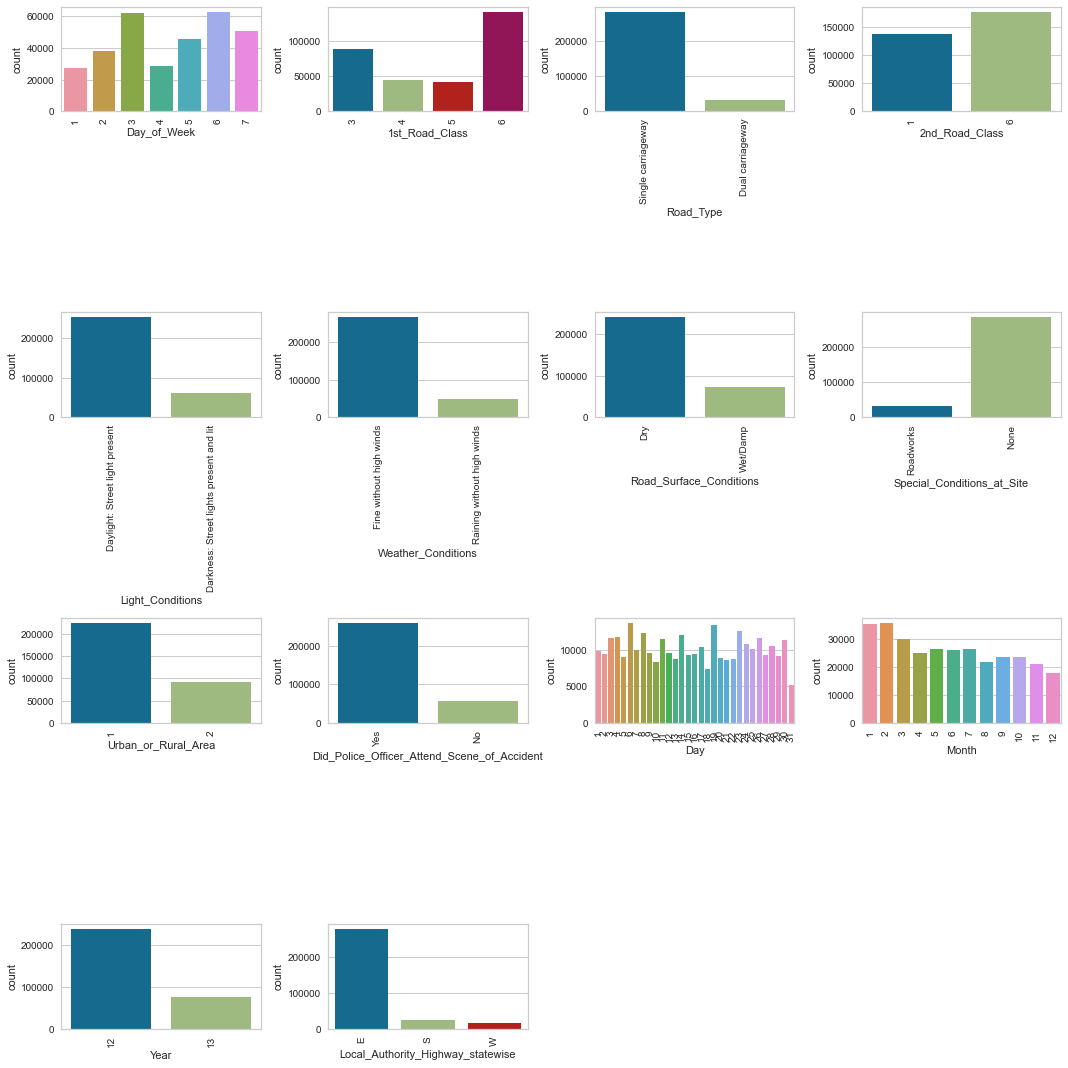

In [386]:
plt.rcParams['figure.figsize']=[15,15]
c =1
for i in cat:
    plt.subplot(4,4,c)
    sns.countplot(data=df2,x=i)
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Inferences
* Day_of_Week: 6th and 3rd day of week seem more frequently occuring than other classes. 4th day is the least occuring
* 1st_Road_Class: 6 road class is seen more frequently than other classes followed by 3 road class. 4 is slightly more than 5 road number. 
* Road Type:Single Carriageway is seen most in the data. Presence of Dual carriageway is  very less compared to the former type of carriageway
* 2nd_Road_Class: 6 road calss is seen more than 1.
* Light_Conditions: Daylight:Street light present is seen more than Darkness: Street lights present and lit.
* Weather_Conditions: Fine without high winds is more frequent than Raining wighout high winds.
* Road_Surface_Conditions: Dry condition is seem to be occuring more than other condition
* Special_Conditions_at_Site: None is seen more frequent.
* Urban_or_Rural_Area: Urban area is seen more frequently than Rural area.
* Did_Police_Officer_Attend_Scene_of_Accident: During most accidents police officer attended the scene of accident.
* Day: 6TH date and 19th dates are seen more than other dates. 6th date seen slightly more than 19th date. 31st is the least seen date here since not all months have 31st.
* Month:1st and 2nd months are seen more frequent than other months. 12th month seen least in the data
* Year: Year 2012's data is provided more than the year 2013
* Local_AUTHORITY_Highway_statewise: There are more authority data is available form England. Scotland and Wales are seen quite less in comparision to England

# <font color='hotpink'> Univariate Analysis Numerical feature

In [245]:
num = list(df2.select_dtypes(include=np.number).columns)
num.remove('postcode_label_encoded')

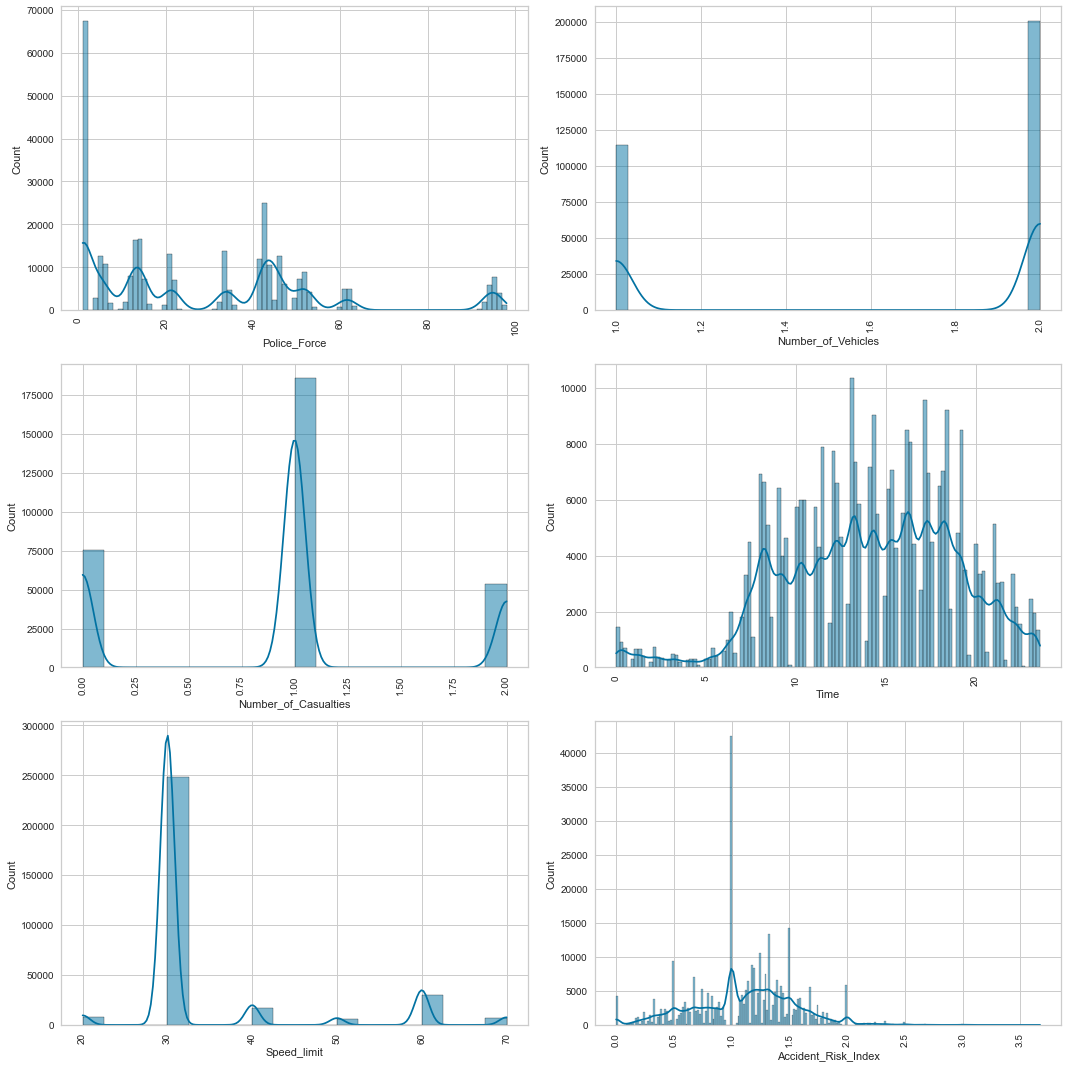

In [387]:
c =1
for i in num:
    plt.subplot(3,2,c)
    sns.histplot(data=df2,x=i,kde=True)
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [246]:
df2['Accident_Risk_Index'].skew()

-0.06231598448525448

In [247]:
df2['Accident_Risk_Index'].kurt()

0.19700851601441238

# Inferences
* Police_Force: There are 0 Police Force seen in lot of districts. Between 45 and 55 follows the former one. There are up to 86 police force availble for few districts.
* Number_of_Vehicles: The data has 2 number of vehicles involved in the accident more than 1.
* Number of casualties: There are 1 number of casualty occuring more than other followed by 0. And 2 number of casulaty occuring least.
* Speed_limit: 30 speed limit is seen more frequent than other speed limit. Followed by 60 than 40. Least seen speed_limit is 70.
* Accident_Risk_Index: The target is normal and no need to transform it. The target has seen 1 Risk index the most. The Range of target is from 0 to 2.5.

# <font color='Blue'> Bivariate Analysis Categorical Feature

# Categorical columns vs target(Numerical)

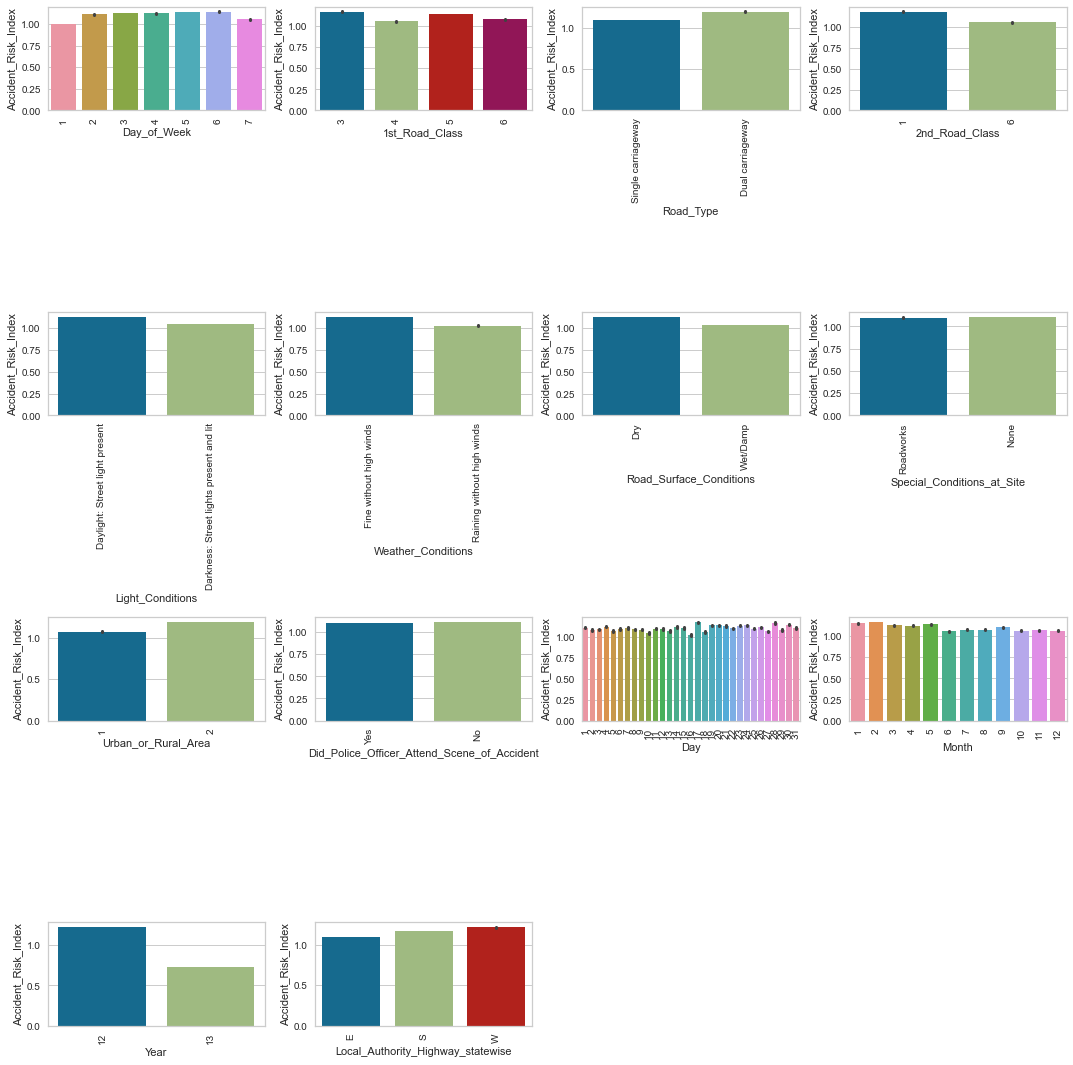

In [406]:
plt.rcParams['figure.figsize']=[15,15]
c =1
for i in cat:
    plt.subplot(4,4,c)
    sns.barplot(data=df2,x=i,y='Accident_Risk_Index')
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Inference
* Day_of_Week: All day of week seem to have same accident risk indedx except for 1st and 7th where 1st being the lowest.
* 1st_Road_Class: The class 3rd has more risk index than othe classes followed by 5th class which is slightly lower than calss 3. 6th class is slightly less than 4th class
* Road_Type: Dual carriageway has higher average risk index than single carriageway
* 2nd_Road_Class: 6th road class has higher average risk index than 1st road calss
* Light_Conditions: Darkness has lower risk index than daylight
* Weather_Conditions: Fine without high winds has higer average accident risk index than raining without high winds.
* Road_Surface_Conditions: Dry condition has higher average risk index than Wet/Damp.
* Special_Conditions_at_Site: Both the conditions has almost equal average risk index.
* Urban_of_Rural_Area: Although Rural area is seen least in the data average risk index is higher for Rural area
* Day: All the day has almost identical average risk index. 17and 28th being slightly higher. Lowest average risk index is on the 15th.
* Month: From 6th month average risk index is almost identical. 2nd month is highest risk index which is slightly higher than 1st month. 
* Year: 2012 has higher risk index than 2013
* Local_Authority_Highway_statewise: Wales has higher risk index than other two contries. Even though England's data is seen more average accident risk index is lowest in England

# Numerical columns vs target(Numerical)

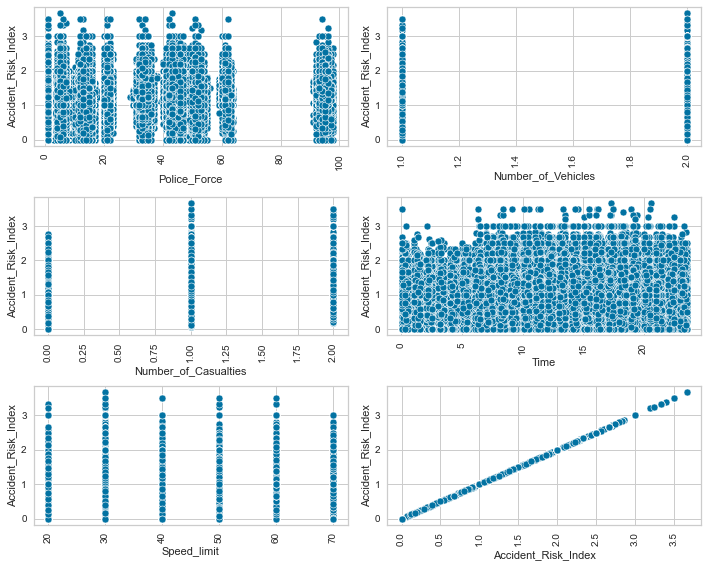

In [400]:
plt.figure(figsize=[10,8])
c =1
for i in num:
    plt.subplot(3,2,c)
    sns.scatterplot(data=df2,x=i,y='Accident_Risk_Index')
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='postcode_label_encoded', ylabel='Accident_Risk_Index'>

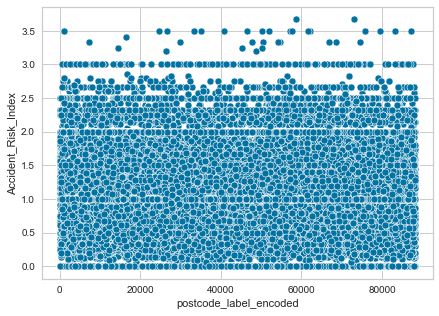

In [404]:
# Checking if there is a trend between postcode and accident risk index
# Since there are thousands of postcode in the data barplot is not possible hence plotting a scatterplot
plt.figure(figsize=[7,5])
sns.scatterplot(data=df2,x='postcode_label_encoded',y='Accident_Risk_Index')
# It can be infered that accident risk index is well distributed in all postcodes 

<AxesSubplot:xlabel='Local_Authority_(District)', ylabel='Accident_Risk_Index'>

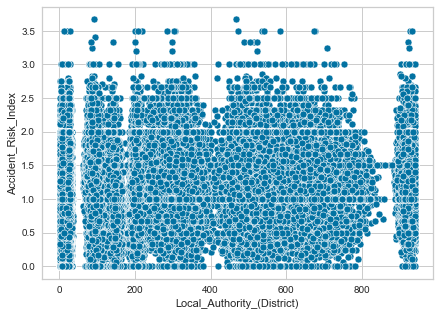

In [405]:
# Checing if there is a trend between district and accident risk index
plt.figure(figsize=[7,5])
sns.scatterplot(data = df2,x='Local_Authority_(District)',y='Accident_Risk_Index')
# There are some district not available in the data 
# There is no pattern seen here

# Inference
* Ther isn't much of a pattern here

## HeatMap

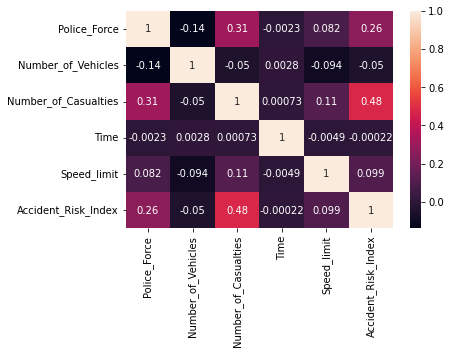

In [248]:
sns.heatmap(df2[num].corr(),annot=True)
plt.show()

# Inference
* Target has good positive correlation with Number_of_Casualties and weak positive correlation with Police_Force
* There is no significant multicorrelation in the data

# <font color = 'rainbow'> Multivariate Analysis

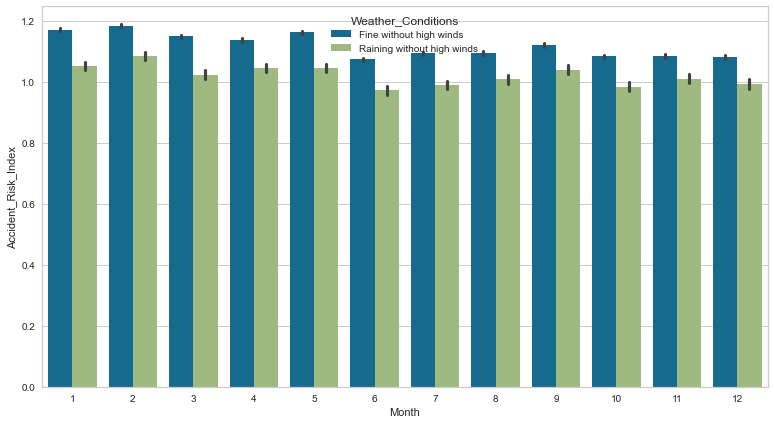

In [391]:
plt.figure(figsize=[13,7])
sns.barplot(data=df2, hue='Weather_Conditions',y='Accident_Risk_Index',x='Month')
plt.show()
# Average accident risk index is higher for fine without high winds for all months. Lowest is for 6th month
# Raining without high winds has lower risk index tham other class for all months. Highest is for 2nd month and 
#lowest is for 6th

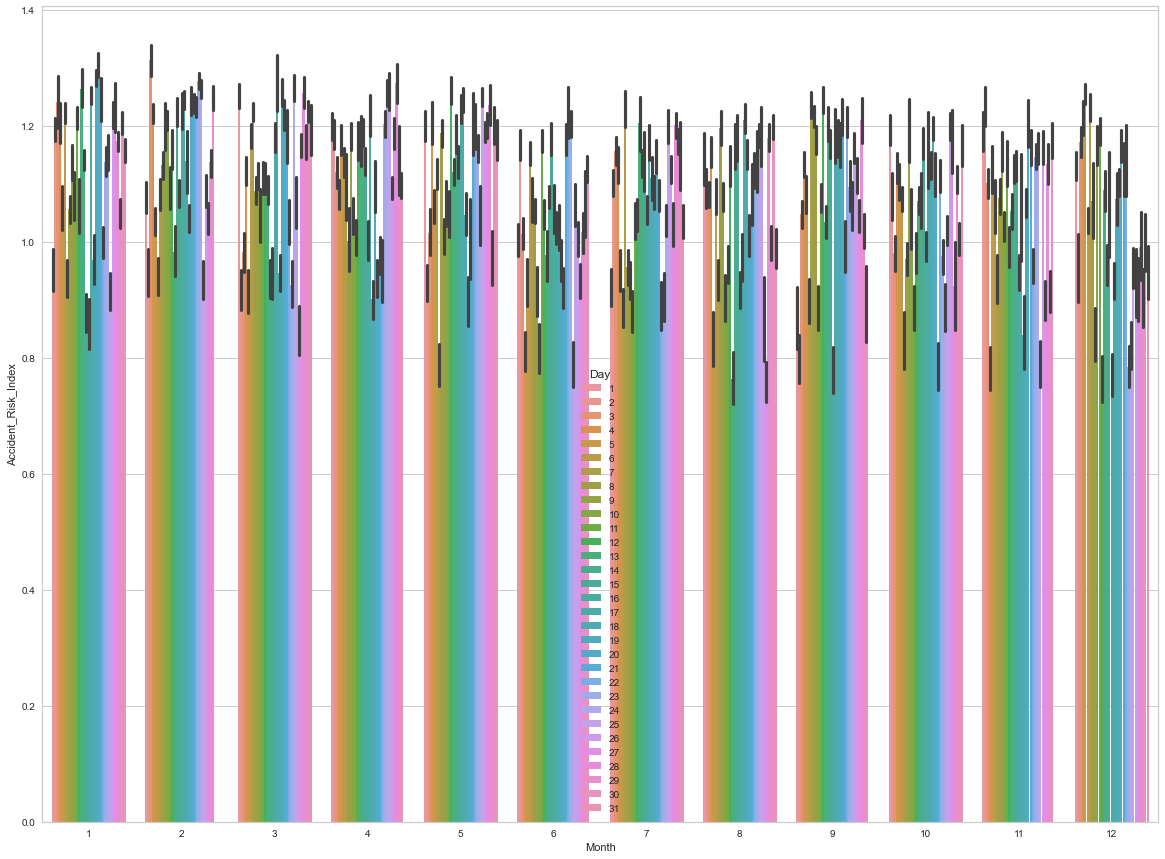

In [392]:
plt.figure(figsize=[20,15])
sns.barplot(data=df2, x='Month',y='Accident_Risk_Index',hue='Day')
plt.show()
# One trend observed here is that in the month of December during christmas holidays average accident_risk index is lower
# There are other dates in each month has seen lower average accident risk index that can be summarized as other holidays

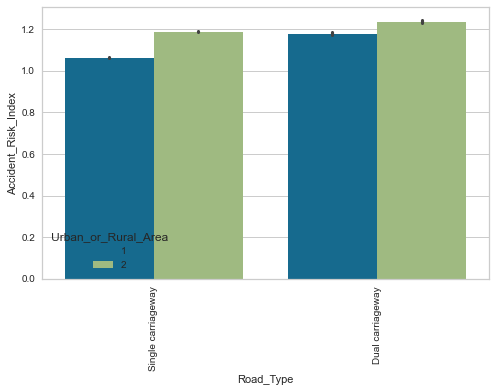

In [393]:
plt.figure(figsize=[8,5])
sns.barplot(data=df2, x='Road_Type',y='Accident_Risk_Index',hue='Urban_or_Rural_Area')
plt.xticks(rotation=90)
plt.show()
# For all road types Rural area has higher average accident risk index on top of that.

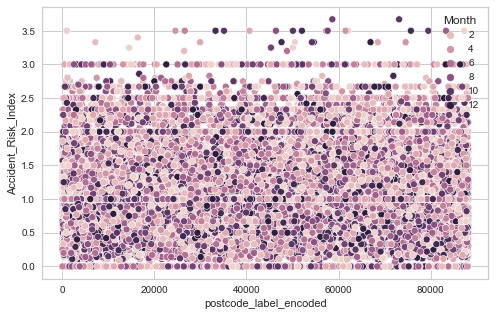

In [394]:
plt.figure(figsize=[8,5])
# The postcode_label_encoded vs target didnot give any insight now checking if third column can give any insight
sns.scatterplot(data=df1,x='postcode_label_encoded',y='Accident_Risk_Index',hue='Month')
plt.show()
# No insight can be gained here

<AxesSubplot:xlabel='Local_Authority_Highway_statewise', ylabel='Accident_Risk_Index'>

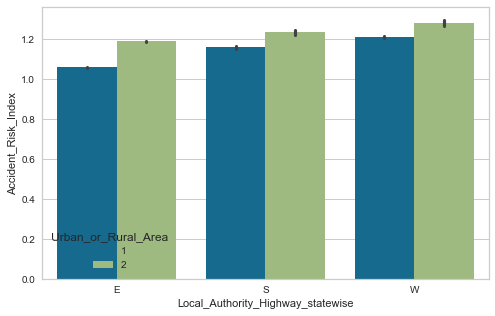

In [395]:
plt.figure(figsize=[8,5])
sns.barplot(data=df1, x='Local_Authority_Highway_statewise',y='Accident_Risk_Index',hue='Urban_or_Rural_Area')
# England seems to be safer as compared to other two countries. Scotland and Wales seems almost equal.

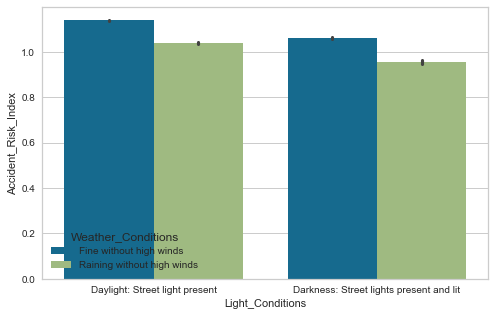

In [396]:
plt.figure(figsize=[8,5])
sns.barplot(data=df1, x='Light_Conditions',y='Accident_Risk_Index',hue='Weather_Conditions')
plt.show()
# Average risk index for daylight is higher than darkness for both weather conditions

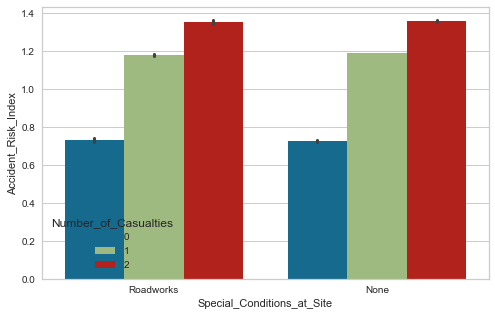

In [397]:
plt.figure(figsize=[8,5])
sns.barplot(data=df1, x='Special_Conditions_at_Site',y='Accident_Risk_Index',hue='Number_of_Casualties')
plt.show()
# Risk of 0 casualty is same for both special conditions. risk of 2 casualty is highest for both special conditions

# Statistical test

In [249]:
import scipy.stats as stats

In [250]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [262]:
df2['first_road_calss'] = df2['1st_Road_Class']
df2['second_road_class'] = df2['2nd_Road_Class']
mod = sfa.ols(f'Accident_Risk_Index~first_road_calss',data=df2).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
first_road_calss,3.0,642.573728,214.191243,1103.66292,0.0
Residual,314932.0,61119.817655,0.194073,NaN,NaN


In [264]:
mod = sfa.ols(f'Accident_Risk_Index~second_road_class',data=df2).fit()
anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
second_road_class,1.0,1259.628034,1259.628034,6556.720276,0.0
Residual,314934.0,60502.763349,0.192113,NaN,NaN


In [265]:
# Both of them are significant variables

In [268]:
df2.drop(columns=['second_road_class','first_road_calss'],inplace=True)

In [260]:
impact = []
no_impact = []
for i in df2[cat].drop(columns=['Day','1st_Road_Class','2nd_Road_Class']).columns:
    print(f'\t\t{i}')
    print(f'Ho: {i} has no impact on Accident_Risk_Index')
    print(f'Ha: {i} has an impact on Accident_Risk_Index')
    print()
    mod = sfa.ols(f'Accident_Risk_Index~{i}',data=df2).fit()
    pval = mod.pvalues[1]
    if pval<0.05:
        print(f'{pval} < 0.05. Reject Ho.')
        print(f"'{i}' has an impact on Accident_Risk_Index")
        print('-'*100)
        impact.append(i)
    else:
        print(f'{pval}>0.05. Fail to reject Ho.')
        print(f"'{i}' has no impact on Accident_Risk_Index")
        print('-'*100)
        no_impact.append(i)

		Day_of_Week
Ho: Day_of_Week has no impact on Accident_Risk_Index
Ha: Day_of_Week has an impact on Accident_Risk_Index

8.297105830021447e-225 < 0.05. Reject Ho.
'Day_of_Week' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Road_Type
Ho: Road_Type has no impact on Accident_Risk_Index
Ha: Road_Type has an impact on Accident_Risk_Index

0.0 < 0.05. Reject Ho.
'Road_Type' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Light_Conditions
Ho: Light_Conditions has no impact on Accident_Risk_Index
Ha: Light_Conditions has an impact on Accident_Risk_Index

0.0 < 0.05. Reject Ho.
'Light_Conditions' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Weather_Conditions
Ho: Weather_Conditions has no impact on Accident_Risk_Index


In [269]:
impact.extend(['1st_road_calss','2nd_road_calss'])

In [278]:
for i in df2[num].drop(columns=['Accident_Risk_Index']).columns:
    print(f'\t\t{i}')
    print(f'Ho: {i} has no impact on Accident_Risk_Index')
    print(f'Ha: {i} has an impact on Accident_Risk_Index')
    print()
    stat,pval = stats.pearsonr(df2['Accident_Risk_Index'],df2[i])
    if pval<0.05:
        print(f'{pval} < 0.05. Reject Ho.')
        print(f"'{i}' has an impact on Accident_Risk_Index")
        print('-'*100)
        impact.append(i)
    else:
        print(f'{pval}>0.05. Fail to reject Ho.')
        print(f"'{i}' has no impact on Accident_Risk_Index")
        print('-'*100)
        no_impact.append(i)

		Police_Force
Ho: Police_Force has no impact on Accident_Risk_Index
Ha: Police_Force has an impact on Accident_Risk_Index

0.0 < 0.05. Reject Ho.
'Police_Force' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Number_of_Vehicles
Ho: Number_of_Vehicles has no impact on Accident_Risk_Index
Ha: Number_of_Vehicles has an impact on Accident_Risk_Index

4.392738528973057e-174 < 0.05. Reject Ho.
'Number_of_Vehicles' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Number_of_Casualties
Ho: Number_of_Casualties has no impact on Accident_Risk_Index
Ha: Number_of_Casualties has an impact on Accident_Risk_Index

0.0 < 0.05. Reject Ho.
'Number_of_Casualties' has an impact on Accident_Risk_Index
----------------------------------------------------------------------------------------------------
		Time
Ho: Time has no im

In [283]:
impact,no_impact

(['Day_of_Week',
  'Road_Type',
  'Light_Conditions',
  'Weather_Conditions',
  'Road_Surface_Conditions',
  'Special_Conditions_at_Site',
  'Urban_or_Rural_Area',
  'Did_Police_Officer_Attend_Scene_of_Accident',
  'Month',
  'Year',
  'Local_Authority_Highway_statewise',
  '1st_road_calss',
  '2nd_road_calss',
  'Day_of_Week',
  'Police_Force',
  'Number_of_Vehicles',
  'Number_of_Casualties',
  'Speed_limit',
  'Police_Force',
  'Number_of_Vehicles',
  'Number_of_Casualties',
  'Time',
  'Speed_limit',
  'Police_Force',
  'Number_of_Vehicles',
  'Number_of_Casualties',
  'Time',
  'Speed_limit'],
 ['Time', 'Accident_Risk_Index'])

## Removing Outliers

<AxesSubplot:>

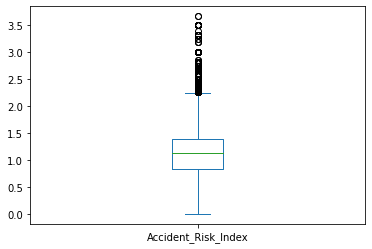

In [284]:
df1['Accident_Risk_Index'].plot(kind = 'box')

In [285]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

IQR = Q3 - Q1

Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

df1_new = df1[~((df1 > Upper_Limit) | (df1 < Lower_Limit)).any(axis=1)]

In [286]:
df1_new.shape

(119500, 23)

In [137]:
# Since the data is very less will not remove the outliers

## Model Building

In [289]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ms = MinMaxScaler()
sc = StandardScaler()

In [290]:
X = df1.drop(columns = 'Accident_Risk_Index')
y = df1['Accident_Risk_Index']

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [293]:
x_dummy = pd.get_dummies(xtrain.select_dtypes(include = np.object_), drop_first = True)
x_dummy.head()

,Road_Type_Single carriageway,Light_Conditions_Daylight: Street light present,Weather_Conditions_Raining without high winds,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Roadworks,Did_Police_Officer_Attend_Scene_of_Accident_Yes,Local_Authority_Highway_statewise_S,Local_Authority_Highway_statewise_W
Accident_ID,,,,,,,,
566776,1,0,0,0,0,1,0,0
591706,1,0,1,1,0,1,0,0
148806,1,1,0,1,0,1,0,0
250428,0,1,0,0,0,1,0,0
24169,1,1,0,0,0,1,0,0


In [294]:
x_cat = xtrain.select_dtypes(include = np.number)
x_ca = sc.fit(x_cat)
x_cat = pd.DataFrame(sc.transform(x_cat),columns = x_cat.columns,index = list(x_cat.index))
x_cat.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Day,Month,Year,postcode_label_encoded
566776,0.666036,-1.324244,0.106821,0.865598,0.207979,0.617878,-1.358422,1.602784,-0.401852,0.882104,-0.636041,0.264248,-0.253647,-0.561035,-1.560556
591706,-1.065039,-1.324244,0.106821,1.382893,-1.053705,-1.095508,-1.358422,-0.014778,-0.401852,0.882104,-0.636041,-0.748902,1.487111,-0.561035,0.774195
148806,-0.257204,-1.324244,0.106821,-0.686286,0.195341,-0.176310,-1.358422,-0.211964,0.531808,-1.133654,-0.636041,-0.186041,-1.414153,-0.561035,1.169785
250428,-0.641887,-1.324244,0.106821,-0.168992,-0.213284,-0.904315,-1.358422,-0.481663,3.332790,-1.133654,1.572227,-1.311764,-1.124027,-0.561035,-0.073199
24169,0.896846,0.755148,0.106821,0.348303,0.422823,0.753919,-0.579159,-0.164894,-0.401852,0.882104,-0.636041,0.939682,0.616732,-0.561035,-1.716170


In [295]:
cat_test = pd.get_dummies(xtest.select_dtypes(include = np.object_),drop_first = True)
cat_test.head()

,Road_Type_Single carriageway,Light_Conditions_Daylight: Street light present,Weather_Conditions_Raining without high winds,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Roadworks,Did_Police_Officer_Attend_Scene_of_Accident_Yes,Local_Authority_Highway_statewise_S,Local_Authority_Highway_statewise_W
Accident_ID,,,,,,,,
239403,1,1,0,0,0,1,0,1
218204,1,0,0,1,0,0,0,0
531958,1,0,0,0,0,1,0,0
262339,1,1,0,0,0,1,0,0
205651,1,1,0,0,0,1,0,0


In [296]:
num_test = xtest.select_dtypes(include = np.number)
num_test = pd.DataFrame(sc.transform(num_test), columns = num_test.columns, index = list(num_test.index))
num_test.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Day,Month,Year,postcode_label_encoded
239403,1.319998,-1.324244,1.676034,0.865598,0.418611,1.518692,-1.358422,2.105290,-0.401852,0.882104,-0.636041,0.489393,-1.414153,-0.561035,-1.394226
218204,-1.065039,0.755148,1.676034,-0.686286,-0.388109,-1.121246,0.979368,-0.476575,-0.401852,0.882104,-0.636041,-0.974047,0.036479,-0.561035,-0.992119
531958,0.242884,0.755148,1.676034,-0.686286,-0.977877,-0.168956,0.200105,-0.186520,2.399129,-1.133654,1.572227,-1.311764,1.196985,-0.561035,-1.127162
262339,0.627568,-1.324244,0.106821,-1.720876,1.669763,0.599494,-0.579159,0.888462,-0.401852,0.882104,1.572227,0.714537,-1.124027,-0.561035,-0.604421
205651,-0.949634,0.755148,1.676034,-1.203581,0.812492,-0.852840,0.979368,-0.481027,-0.401852,0.882104,-0.636041,0.939682,0.326606,-0.561035,1.272559


In [297]:
xtest = pd.concat([cat_test, num_test], axis = 1)

In [298]:
xtrain = pd.concat([x_dummy,x_cat], axis = 1)

In [299]:
xtrain.head()

,Road_Type_Single carriageway,Light_Conditions_Daylight: Street light present,Weather_Conditions_Raining without high winds,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Roadworks,Did_Police_Officer_Attend_Scene_of_Accident_Yes,Local_Authority_Highway_statewise_S,Local_Authority_Highway_statewise_W,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,Day,Month,Year,postcode_label_encoded
566776,1,0,0,0,0,1,0,0,0.666036,-1.324244,0.106821,0.865598,0.207979,0.617878,-1.358422,1.602784,-0.401852,0.882104,-0.636041,0.264248,-0.253647,-0.561035,-1.560556
591706,1,0,1,1,0,1,0,0,-1.065039,-1.324244,0.106821,1.382893,-1.053705,-1.095508,-1.358422,-0.014778,-0.401852,0.882104,-0.636041,-0.748902,1.487111,-0.561035,0.774195
148806,1,1,0,1,0,1,0,0,-0.257204,-1.324244,0.106821,-0.686286,0.195341,-0.176310,-1.358422,-0.211964,0.531808,-1.133654,-0.636041,-0.186041,-1.414153,-0.561035,1.169785
250428,0,1,0,0,0,1,0,0,-0.641887,-1.324244,0.106821,-0.168992,-0.213284,-0.904315,-1.358422,-0.481663,3.332790,-1.133654,1.572227,-1.311764,-1.124027,-0.561035,-0.073199
24169,1,1,0,0,0,1,0,0,0.896846,0.755148,0.106821,0.348303,0.422823,0.753919,-0.579159,-0.164894,-0.401852,0.882104,-0.636041,0.939682,0.616732,-0.561035,-1.716170


### Base Model

In [300]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Linear Regression Model

In [301]:
model = sm.OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Accident_Risk_Index   R-squared (uncentered):                   0.856
Model:                             OLS   Adj. R-squared (uncentered):              0.856
Method:                  Least Squares   F-statistic:                          5.716e+04
Date:                 Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                         19:33:46   Log-Likelihood:                     -1.3797e+05
No. Observations:               220455   AIC:                                  2.760e+05
Df Residuals:                   220432   BIC:                                  2.762e+05
Df Model:                           23                                                  
Covariance Type:             nonrobust                                                  
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Road_Type_Single carriageway                        0.5458      0.002    228.520      0.000       0.541       0.551
Light_Conditions_Daylight: Street light present     0.3254      0.002    149.410      0.000       0.321       0.330
Weather_Conditions_Raining without high winds       0.0374      0.003     13.984      0.000       0.032       0.043
Road_Surface_Conditions_Wet/Damp                    0.0410      0.002     17.965      0.000       0.037       0.045
Special_Conditions_at_Site_Roadworks                0.0574      0.003     17.758      0.000       0.051       0.064
Did_Police_Officer_Attend_Scene_of_Accident_Yes     0.3258      0.002    148.249      0.000       0.322       0.330
Local_Authority_Highway_statewise_S                 0.0993      0.004     26.117      0.000       0.092       0.107
Local_Authority_Highway_statewise_W                 0.1270      0.005     27.942      0.000       0.118       0.136
Police_Force                                        0.0297      0.002     18.038      0.000       0.026       0.033
Number_of_Vehicles                                  0.0029      0.001      2.822      0.005       0.001       0.005
Number_of_Casualties                                0.1023      0.002     60.549      0.000       0.099       0.106
Day_of_Week                                         0.0004      0.001      0.457      0.648      -0.001       0.002
Time                                               -0.0007      0.001     -0.764      0.445      -0.003       0.001
Local_Authority_(District)                          0.0290      0.002     17.527      0.000       0.026       0.032
1st_Road_Class                                     -0.0087      0.001     -8.129      0.000      -0.011      -0.007
1st_Road_Number                                    -0.0061      0.001     -6.166      0.000      -0.008      -0.004
Speed_limit                                         0.0097      0.001      8.528      0.000       0.007       0.012
2nd_Road_Class                                     -0.0164      0.001    -14.755      0.000      -0.019      -0.014
Urban_or_Rural_Area                                -0.0106      0.001     -8.824      0.000      -0.013      -0.008
Day                                                 0.0014      0.001      1.494      0.135      -0.000       0.003
Month                                              -0.0232      0.001    -23.735      0.000      -0.025      -0.021
Year                                               -0.1074      0.002    -61.606      0.000      -0.111      -0.104
postcode_label_encoded                             -0.0022      0.001    

In [304]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

pred_train = model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)

0.45244843973003057 0.4527299881549176


In [306]:
cols = ['Model_Name','RMSE Train','RMSE Test','MAE Train','MAE Test']

results = pd.DataFrame(columns = cols)

mlmodel = pd.Series({'Model_Name':'Full Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898


# Random Forest Model

In [307]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=10).fit(xtrain,ytrain)


pred_train = rf_model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = rf_model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)


mlmodel = pd.Series({'Model_Name':'RandomForest Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

0.1419041849369322 0.37946163873566907


,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061


# Xgboost Model

In [308]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(verbosity=3,random_state=10).fit(xtrain,ytrain)


pred_train = xgb_model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = xgb_model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)


mlmodel = pd.Series({'Model_Name':'XGBOOST Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

[19:44:03] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[19:44:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:44:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:44:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:44:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:44:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:44:04] INFO: 

[19:44:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[19:44:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[19:44:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[19:44:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[19:44:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[19:44:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra node

[19:44:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[19:44:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[19:44:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[19:44:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[19:44:19] ======== Monitor (0): Learner ========
[19:44:19] Configure: 4e-06s, 1 calls @ 4us

[19:44:19] EvalOneIter: 0.00482s, 100 calls @ 4820us

[19:44:19] GetGradient: 0.021769s, 100 calls @ 21769us

[19:44:19] PredictRaw: 0.622037s, 100 calls @ 622037us

[19:44:19] UpdateOneIter: 16.2311s, 100 calls @ 162310

,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061
2,XGBOOST Model,0.358269,0.37267,0.279051,0.290318


# GradientBoosting Model

In [309]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(verbose=10,random_state=10).fit(xtrain,ytrain)


pred_train = gd_model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = gd_model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)

mlmodel = pd.Series({'Model_Name':'GradientBoosting Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

      Iter       Train Loss   Remaining Time 
         1           0.1859            1.32m
         2           0.1779            1.30m
         3           0.1714            1.28m
         4           0.1661            1.27m
         5           0.1618            1.25m
         6           0.1583            1.24m
         7           0.1555            1.22m
         8           0.1532            1.21m
         9           0.1513            1.20m
        10           0.1498            1.19m
        11           0.1486            1.18m
        12           0.1475            1.17m
        13           0.1467            1.16m
        14           0.1460            1.14m
        15           0.1454            1.13m
        16           0.1449            1.12m
        17           0.1445            1.10m
        18           0.1441            1.09m
        19           0.1439            1.08m
        20           0.1436            1.06m
        21           0.1434            1.05m
        2

,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061
2,XGBOOST Model,0.358269,0.37267,0.279051,0.290318
3,GradientBoosting Model,0.374038,0.375205,0.29144,0.29242


In [318]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(random_state=10).fit(xtrain,ytrain)


pred_train = ada_model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = ada_model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)

mlmodel = pd.Series({'Model_Name':'AdaBoost Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

0.3900780800210133 0.3909284967875886


,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061
2,XGBOOST Model,0.358269,0.37267,0.279051,0.290318
3,GradientBoosting Model,0.374038,0.375205,0.29144,0.29242
4,AdaBoost Model,0.390078,0.390928,0.306713,0.307343


In [322]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(random_state=10).fit(xtrain,ytrain)


pred_train = cat_model.predict(xtrain)
mae_train = mean_absolute_error(ytrain, pred_train)

pred_test = cat_model.predict(xtest)
mae_test = mean_absolute_error(ytest, pred_test)


#MSE

mse_train = mean_squared_error(ytrain, pred_train)
mse_test = mean_squared_error(ytest, pred_test)


# Root Mean Squared Error

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(rmse_train,rmse_test)

mlmodel = pd.Series({'Model_Name':'CatBoost Model','RMSE Train':rmse_train,'RMSE Test':rmse_test,'MAE Train':mae_train,
                    'MAE Test':mae_test})
results = results.append(mlmodel, ignore_index = True)
results

Learning rate set to 0.096034
0:	learn: 0.4316250	total: 26.5ms	remaining: 26.5s
1:	learn: 0.4225767	total: 45.5ms	remaining: 22.7s
2:	learn: 0.4149408	total: 71ms	remaining: 23.6s
3:	learn: 0.4085499	total: 96.1ms	remaining: 23.9s
4:	learn: 0.4031866	total: 122ms	remaining: 24.2s
5:	learn: 0.3987161	total: 145ms	remaining: 24.1s
6:	learn: 0.3950540	total: 171ms	remaining: 24.2s
7:	learn: 0.3918760	total: 198ms	remaining: 24.6s
8:	learn: 0.3894806	total: 220ms	remaining: 24.3s
9:	learn: 0.3873456	total: 246ms	remaining: 24.4s
10:	learn: 0.3854804	total: 269ms	remaining: 24.2s
11:	learn: 0.3840104	total: 293ms	remaining: 24.1s
12:	learn: 0.3826920	total: 318ms	remaining: 24.1s
13:	learn: 0.3816199	total: 340ms	remaining: 23.9s
14:	learn: 0.3806950	total: 363ms	remaining: 23.8s
15:	learn: 0.3799279	total: 388ms	remaining: 23.9s
16:	learn: 0.3793652	total: 413ms	remaining: 23.9s
17:	learn: 0.3788744	total: 438ms	remaining: 23.9s
18:	learn: 0.3784442	total: 463ms	remaining: 23.9s
19:	learn

165:	learn: 0.3724994	total: 3.99s	remaining: 20s
166:	learn: 0.3724880	total: 4.01s	remaining: 20s
167:	learn: 0.3724640	total: 4.04s	remaining: 20s
168:	learn: 0.3724459	total: 4.06s	remaining: 20s
169:	learn: 0.3724270	total: 4.08s	remaining: 19.9s
170:	learn: 0.3724051	total: 4.11s	remaining: 19.9s
171:	learn: 0.3723794	total: 4.14s	remaining: 19.9s
172:	learn: 0.3723602	total: 4.16s	remaining: 19.9s
173:	learn: 0.3723438	total: 4.18s	remaining: 19.9s
174:	learn: 0.3723323	total: 4.21s	remaining: 19.8s
175:	learn: 0.3723109	total: 4.23s	remaining: 19.8s
176:	learn: 0.3722943	total: 4.26s	remaining: 19.8s
177:	learn: 0.3722792	total: 4.28s	remaining: 19.8s
178:	learn: 0.3722691	total: 4.31s	remaining: 19.8s
179:	learn: 0.3722572	total: 4.33s	remaining: 19.7s
180:	learn: 0.3722395	total: 4.35s	remaining: 19.7s
181:	learn: 0.3722199	total: 4.38s	remaining: 19.7s
182:	learn: 0.3722077	total: 4.4s	remaining: 19.6s
183:	learn: 0.3721911	total: 4.42s	remaining: 19.6s
184:	learn: 0.3721758

328:	learn: 0.3702126	total: 7.86s	remaining: 16s
329:	learn: 0.3701989	total: 7.89s	remaining: 16s
330:	learn: 0.3701852	total: 7.91s	remaining: 16s
331:	learn: 0.3701708	total: 7.94s	remaining: 16s
332:	learn: 0.3701602	total: 7.96s	remaining: 15.9s
333:	learn: 0.3701487	total: 7.99s	remaining: 15.9s
334:	learn: 0.3701369	total: 8.01s	remaining: 15.9s
335:	learn: 0.3701270	total: 8.03s	remaining: 15.9s
336:	learn: 0.3701161	total: 8.05s	remaining: 15.8s
337:	learn: 0.3701049	total: 8.08s	remaining: 15.8s
338:	learn: 0.3700955	total: 8.1s	remaining: 15.8s
339:	learn: 0.3700812	total: 8.13s	remaining: 15.8s
340:	learn: 0.3700702	total: 8.15s	remaining: 15.8s
341:	learn: 0.3700582	total: 8.18s	remaining: 15.7s
342:	learn: 0.3700455	total: 8.21s	remaining: 15.7s
343:	learn: 0.3700306	total: 8.24s	remaining: 15.7s
344:	learn: 0.3700207	total: 8.26s	remaining: 15.7s
345:	learn: 0.3700067	total: 8.29s	remaining: 15.7s
346:	learn: 0.3699928	total: 8.32s	remaining: 15.7s
347:	learn: 0.3699825

491:	learn: 0.3683630	total: 11.9s	remaining: 12.3s
492:	learn: 0.3683546	total: 12s	remaining: 12.3s
493:	learn: 0.3683450	total: 12s	remaining: 12.3s
494:	learn: 0.3683316	total: 12s	remaining: 12.3s
495:	learn: 0.3683177	total: 12s	remaining: 12.2s
496:	learn: 0.3683083	total: 12.1s	remaining: 12.2s
497:	learn: 0.3682972	total: 12.1s	remaining: 12.2s
498:	learn: 0.3682869	total: 12.1s	remaining: 12.2s
499:	learn: 0.3682752	total: 12.1s	remaining: 12.1s
500:	learn: 0.3682600	total: 12.2s	remaining: 12.1s
501:	learn: 0.3682478	total: 12.2s	remaining: 12.1s
502:	learn: 0.3682385	total: 12.2s	remaining: 12.1s
503:	learn: 0.3682250	total: 12.3s	remaining: 12.1s
504:	learn: 0.3682130	total: 12.3s	remaining: 12s
505:	learn: 0.3682004	total: 12.3s	remaining: 12s
506:	learn: 0.3681905	total: 12.3s	remaining: 12s
507:	learn: 0.3681772	total: 12.4s	remaining: 12s
508:	learn: 0.3681689	total: 12.4s	remaining: 11.9s
509:	learn: 0.3681602	total: 12.4s	remaining: 11.9s
510:	learn: 0.3681475	total:

654:	learn: 0.3666289	total: 15.9s	remaining: 8.35s
655:	learn: 0.3666196	total: 15.9s	remaining: 8.33s
656:	learn: 0.3666052	total: 15.9s	remaining: 8.31s
657:	learn: 0.3665953	total: 15.9s	remaining: 8.28s
658:	learn: 0.3665857	total: 16s	remaining: 8.26s
659:	learn: 0.3665791	total: 16s	remaining: 8.23s
660:	learn: 0.3665677	total: 16s	remaining: 8.21s
661:	learn: 0.3665604	total: 16s	remaining: 8.19s
662:	learn: 0.3665497	total: 16.1s	remaining: 8.17s
663:	learn: 0.3665417	total: 16.1s	remaining: 8.14s
664:	learn: 0.3665321	total: 16.1s	remaining: 8.12s
665:	learn: 0.3665234	total: 16.1s	remaining: 8.1s
666:	learn: 0.3665122	total: 16.2s	remaining: 8.07s
667:	learn: 0.3665036	total: 16.2s	remaining: 8.05s
668:	learn: 0.3664890	total: 16.2s	remaining: 8.03s
669:	learn: 0.3664799	total: 16.2s	remaining: 8s
670:	learn: 0.3664693	total: 16.3s	remaining: 7.98s
671:	learn: 0.3664572	total: 16.3s	remaining: 7.96s
672:	learn: 0.3664516	total: 16.3s	remaining: 7.93s
673:	learn: 0.3664393	to

818:	learn: 0.3650490	total: 19.8s	remaining: 4.37s
819:	learn: 0.3650405	total: 19.8s	remaining: 4.35s
820:	learn: 0.3650325	total: 19.8s	remaining: 4.32s
821:	learn: 0.3650241	total: 19.9s	remaining: 4.3s
822:	learn: 0.3650159	total: 19.9s	remaining: 4.27s
823:	learn: 0.3650053	total: 19.9s	remaining: 4.25s
824:	learn: 0.3649914	total: 19.9s	remaining: 4.23s
825:	learn: 0.3649816	total: 20s	remaining: 4.2s
826:	learn: 0.3649713	total: 20s	remaining: 4.18s
827:	learn: 0.3649602	total: 20s	remaining: 4.16s
828:	learn: 0.3649487	total: 20s	remaining: 4.13s
829:	learn: 0.3649409	total: 20.1s	remaining: 4.11s
830:	learn: 0.3649303	total: 20.1s	remaining: 4.08s
831:	learn: 0.3649222	total: 20.1s	remaining: 4.06s
832:	learn: 0.3649130	total: 20.1s	remaining: 4.04s
833:	learn: 0.3649042	total: 20.2s	remaining: 4.01s
834:	learn: 0.3648943	total: 20.2s	remaining: 3.99s
835:	learn: 0.3648866	total: 20.2s	remaining: 3.96s
836:	learn: 0.3648756	total: 20.2s	remaining: 3.94s
837:	learn: 0.3648693	

985:	learn: 0.3635286	total: 23.9s	remaining: 339ms
986:	learn: 0.3635210	total: 23.9s	remaining: 315ms
987:	learn: 0.3635097	total: 23.9s	remaining: 291ms
988:	learn: 0.3635007	total: 23.9s	remaining: 266ms
989:	learn: 0.3634912	total: 24s	remaining: 242ms
990:	learn: 0.3634816	total: 24s	remaining: 218ms
991:	learn: 0.3634719	total: 24s	remaining: 194ms
992:	learn: 0.3634631	total: 24s	remaining: 169ms
993:	learn: 0.3634566	total: 24.1s	remaining: 145ms
994:	learn: 0.3634520	total: 24.1s	remaining: 121ms
995:	learn: 0.3634432	total: 24.1s	remaining: 96.8ms
996:	learn: 0.3634328	total: 24.1s	remaining: 72.6ms
997:	learn: 0.3634202	total: 24.1s	remaining: 48.4ms
998:	learn: 0.3634115	total: 24.2s	remaining: 24.2ms
999:	learn: 0.3634013	total: 24.2s	remaining: 0us
0.3634012932186987 0.3739752423095906


,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061
2,XGBOOST Model,0.358269,0.37267,0.279051,0.290318
3,GradientBoosting Model,0.374038,0.375205,0.29144,0.29242
4,AdaBoost Model,0.390078,0.390928,0.306713,0.307343
5,CatBoost Model,0.363401,0.373975,0.283432,0.291668


In [323]:
results

,Model_Name,RMSE Train,RMSE Test,MAE Train,MAE Test
0,Full Model,0.452448,0.45273,0.354163,0.354898
1,RandomForest Model,0.141904,0.379462,0.109912,0.296061
2,XGBOOST Model,0.358269,0.37267,0.279051,0.290318
3,GradientBoosting Model,0.374038,0.375205,0.29144,0.29242
4,AdaBoost Model,0.390078,0.390928,0.306713,0.307343
5,CatBoost Model,0.363401,0.373975,0.283432,0.291668


In [324]:
from sklearn.model_selection import GridSearchCV

In [327]:
# from sklearn.ensemble import GradientBoostingRegressor
# gd = GradientBoostingRegressor()
# gd_s = GridSearchCV(gd,param_grid=[{'min_samples_split':[2,3,1],'learning_rate':[0.1,0.01,0.5]}]).fit(xtrain,ytrain)
# gd_s.best_params_

In [349]:
# X_ = pd.concat([pd.DataFrame(sc.fit_transform(X.select_dtypes(include=np.number)),
#                              columns=X.select_dtypes(include=np.number).columns,
#                              index=list(X.index)),
#                 pd.get_dummies(X.select_dtypes(include=np.object_),drop_first=True)],axis=1)